In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

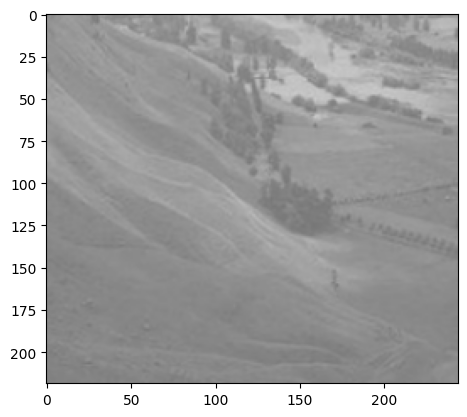

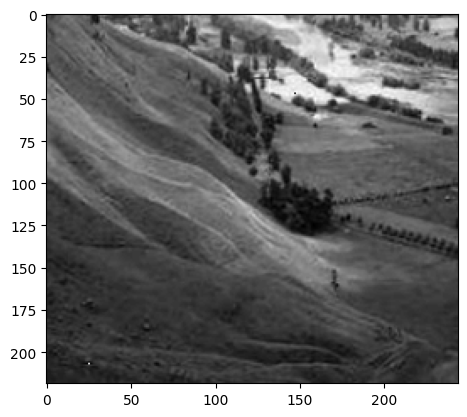

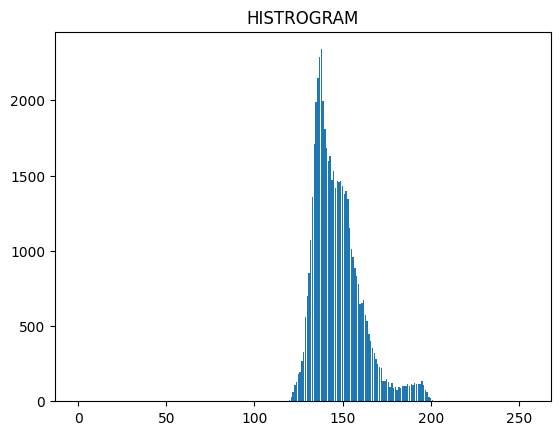

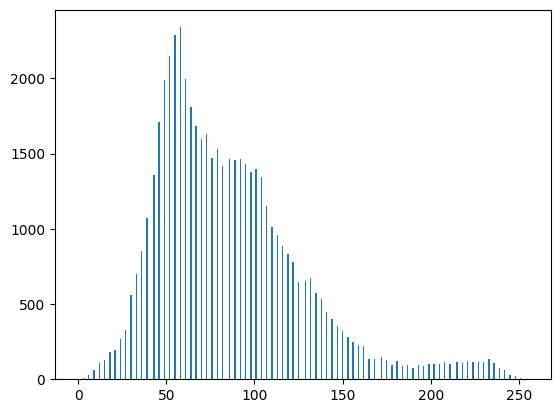

pixel value max ได้แก่: 2339 ที่แถบสี 58
xmin = 119 xmax = 202


In [5]:
def xnew(xmin,xmax,xinput):
    xnew = (xinput-xmin)/(xmax-xmin)*255
    return xnew


bgr = cv2.imread("image/testminmax.png",0) #ภาพBGR
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
h = rgb.shape[0]
w = rgb.shape[1]

Y = np.full(256,0,dtype=int) # array 256 ที่มี0เริ่มต้น type = int
for i in range(h):
    for j in range(w):
        # print(rgb[i][j][0])
        Y[rgb[i][j][0]] +=1


check = 0
checkrate = rgb.size/100*3
for i in range(256):
    check = check + Y[i]
    # print(check)
    if check > 1:
        xmin = i
        break
check = 0
for i in range(255, -1, -1):
    check = check + Y[i]
    # print(check)
    if check > 1:
        xmax = i
        break

img_out = np.full((h,w,3),0,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        img_out[i][j][0:3] = xnew(xmin,xmax,rgb[i][j][0])

Y2 = np.full(256,0,dtype=int) # array 256 ที่มี0เริ่มต้น type = int
for i in range(h):
    for j in range(w):
        # print(rgb[i][j][0])
        Y2[img_out[i][j][0]] +=1

plt.imshow(rgb)
plt.show()
plt.imshow(img_out)
plt.show()
plt.bar(range(256),Y)
plt.title("HISTROGRAM")
plt.show()
plt.bar(range(256),Y2)
plt.show()

maxx = np.max(Y2)
index = np.argmax(Y2)
print(f"pixel value max ได้แก่: {maxx} ที่แถบสี {index}")
print(f"xmin = {xmin} xmax = {xmax}")

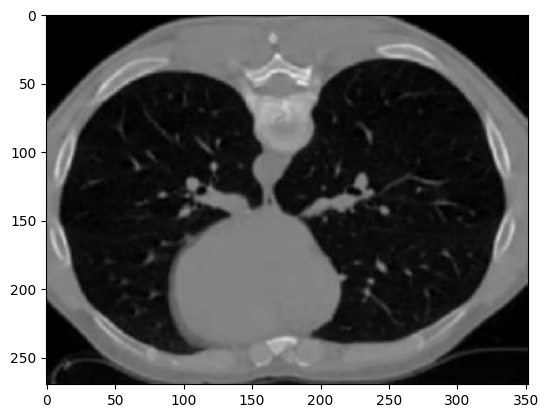

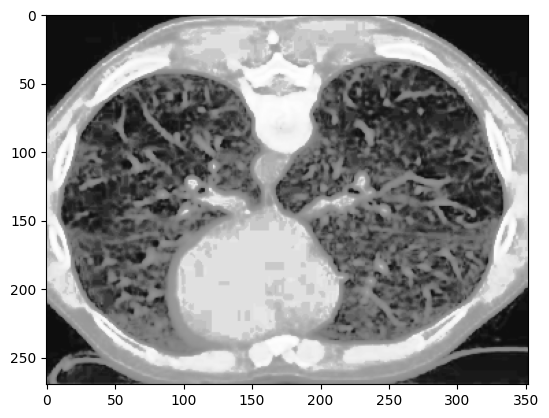

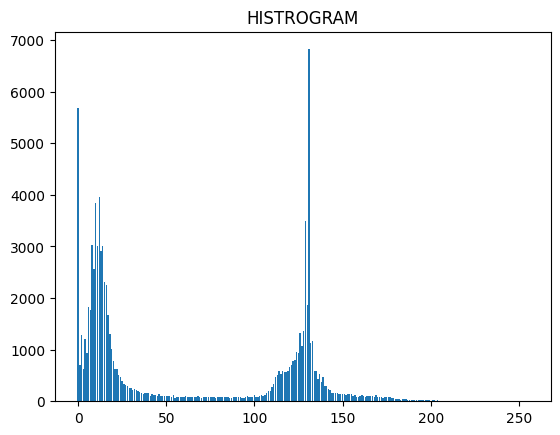

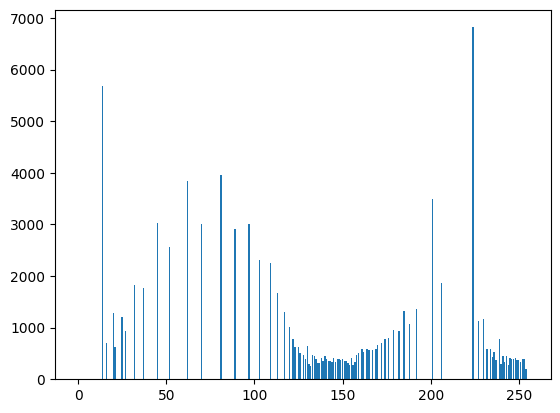

In [29]:

bgr = cv2.imread("image/testeq.png",0) #ภาพBGR
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
h = rgb.shape[0]
w = rgb.shape[1]

N = np.full(256,0,dtype=int)
for i in range(h):
    for j in range(w):
        N[rgb[i][j][0]] +=1


sumN = 0 
size = h*w
Fg = np.full(256,0,dtype=int) 
for i in range(256):
    sumN = sumN + N[i]
    
    Fg[i] = max(0,round((255*(sumN/size)))-1)
    
# print(Fg[150])

img_out = np.full((h,w,3),0,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        x = rgb[i][j][0] 
        img_out[i][j][0:3] = Fg[x]

plt.imshow(rgb)
plt.show()
plt.imshow(img_out)
plt.show()

Y = np.full(256,0,dtype=int) # array 256 ที่มี0เริ่มต้น type = int
for i in range(h):
    for j in range(w):
        # print(rgb[i][j][0])
        Y[rgb[i][j][0]] +=1

Y2 = np.full(256,0,dtype=int) # array 256 ที่มี0เริ่มต้น type = int
for i in range(h):
    for j in range(w):
        # print(rgb[i][j][0])
        Y2[img_out[i][j][0]] +=1

plt.bar(range(256),Y)
plt.title("HISTROGRAM")
plt.show()
plt.bar(range(256),Y2)
plt.show()

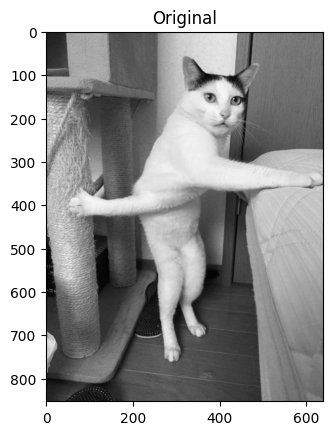

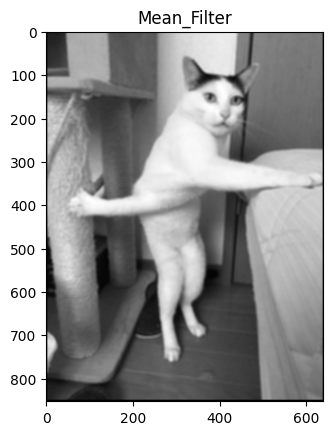

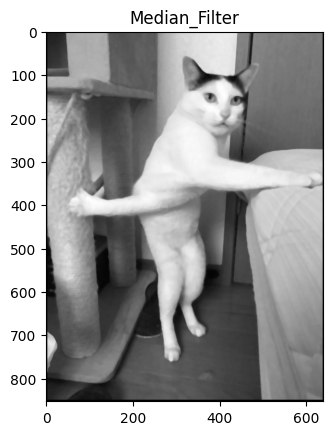

In [7]:
def Mean_Filter(img, mask): #ยังไม่ได้ทำ padding
    h = img.shape[0]
    w = img.shape[1]
    
    h_mask = len(mask[0])
    w_mask = len(mask[1])

    mean= np.zeros((h,w), dtype=np.uint8)
    constant_H = (h_mask - 1) // 2
    constant_W = (w_mask - 1) // 2
    for i in range(constant_H, h-constant_H):
        for j in range(constant_W,w-constant_W):
            temp= img[i-constant_H:i+constant_H+1, j-constant_W:j+constant_W+1]
            product= temp*mask
            mean[i,j]= np.sum(product)/(h_mask*w_mask)
    return mean

def Median_Filter(img, mask): #ยังไม่ได้ทำ padding
    h = img.shape[0]
    w = img.shape[1]
    
    h_mask = len(mask[0])
    w_mask = len(mask[1])

    median= np.zeros((h,w), dtype=np.uint8)
    constant_H = (h_mask - 1) // 2
    constant_W = (w_mask - 1) // 2
    for i in range(constant_H, h-constant_H):
        for j in range(constant_W,w-constant_W):
            temp= img[i-constant_H:i+constant_H+1, j-constant_W:j+constant_W+1]
            product = temp*mask
            median[i,j]= np.median(product)
    return median

size=7
mask= np.ones((size,size), dtype=np.uint8)

img = cv2.imread("image/cat.jpg",0) #ภาพBGR

test_mean = Mean_Filter(img, mask)
test_median = Median_Filter(img, mask)

plt.imshow(img, cmap= 'gray')
plt.title("Original")
plt.show()
plt.imshow(test_mean, cmap= 'gray')
plt.title("Mean_Filter")
plt.show()
plt.imshow(test_median, cmap= 'gray')
plt.title("Median_Filter")
plt.show()

In [3]:
def Grayscale(img):
    h = img.shape[0]
    w = img.shape[1]
    img_out = img_out = np.full((h,w,3),0,dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = img[i][j][1]
    return img_out

49


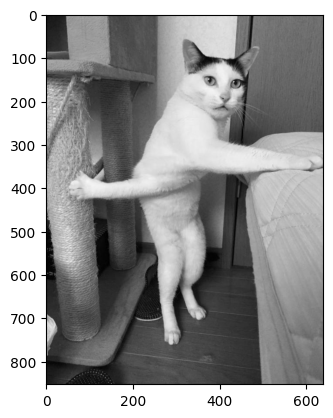

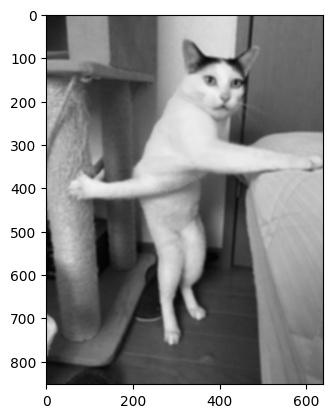

In [30]:
img_bgr = cv2.imread("image/cat.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
imgGray = Grayscale(img_rgb)
size = 7
mask = np.full((size,size),1,dtype=np.uint16)

imH = imgGray.shape[0]
imW = imgGray.shape[1]
filterH = mask.shape[0]
filterW = mask.shape[1]
filterHCenter = int((filterH+1)/2)-1
filterWCenter = int((filterW+1)/2)-1

sumWeightMask = 0
for i in range(filterH):
    for j in range(filterW):
        sumWeightMask = sumWeightMask + mask[i][j]

imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
for i in range(imH):
    for j in range(imW):
        sumMask = 0
        for fi in range(filterH):
            for fj in range(filterW):
                posX = i + (fi-filterHCenter)
                posY = j + (fj-filterWCenter)
                if posX < 0 :
                    posX = 0
                elif posX >= imH :
                    posX = imH - 1
                if posY <0:
                    posY = 0
                elif posY >= imW :
                    posY = imW - 1 
                sumMask = sumMask + imgGray[posX][posY][1] * mask[fi][fj]
        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = int(sumMask/sumWeightMask)





print(sumWeightMask)
plt.imshow(imgGray)
plt.show()
plt.imshow(imgOut)
plt.show()

121


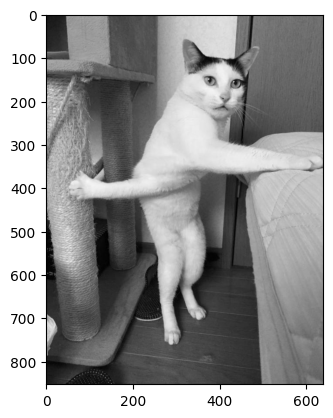

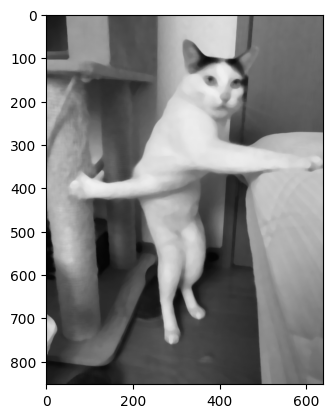

In [10]:
import statistics

img_bgr = cv2.imread("image/cat.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
imgGray = Grayscale(img_rgb)
size = 11
mask = np.full((size,size),1,dtype=np.uint16)
list = []
imH = imgGray.shape[0]
imW = imgGray.shape[1]
filterH = mask.shape[0]
filterW = mask.shape[1]
filterHCenter = int((filterH+1)/2)-1
filterWCenter = int((filterW+1)/2)-1

sumWeightMask = 0
for i in range(filterH):
    for j in range(filterW):
        sumWeightMask = sumWeightMask + mask[i][j]

imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
for i in range(imH):
    for j in range(imW):
        sumMask = 0
        for fi in range(filterH):
            for fj in range(filterW):
                posX = i + (fi-filterHCenter)
                posY = j + (fj-filterWCenter)
                if posX < 0 :
                    posX = 0
                elif posX >= imH :
                    posX = imH - 1
                if posY <0:
                    posY = 0
                elif posY >= imW :
                    posY = imW - 1 
                list.append(imgGray[posX][posY][1])
        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = statistics.median(list)
        list = []





print(sumWeightMask)
plt.imshow(imgGray)
plt.show()
plt.imshow(imgOut)
plt.show()

121


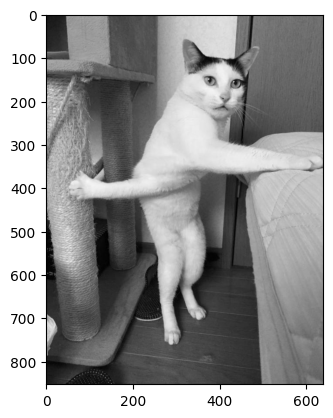

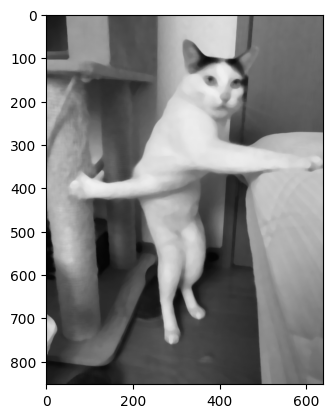

In [11]:
def median_V2(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0
    
img_bgr = cv2.imread("image/cat.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
imgGray = Grayscale(img_rgb)
size = 11
mask = np.full((size,size),1,dtype=np.uint16)
list = []
imH = imgGray.shape[0]
imW = imgGray.shape[1]
filterH = mask.shape[0]
filterW = mask.shape[1]
filterHCenter = int((filterH+1)/2)-1
filterWCenter = int((filterW+1)/2)-1

sumWeightMask = 0
for i in range(filterH):
    for j in range(filterW):
        sumWeightMask = sumWeightMask + mask[i][j]

imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
for i in range(imH):
    for j in range(imW):
        sumMask = 0
        for fi in range(filterH):
            for fj in range(filterW):
                posX = i + (fi-filterHCenter)
                posY = j + (fj-filterWCenter)
                if posX < 0 :
                    posX = 0
                elif posX >= imH :
                    posX = imH - 1
                if posY <0:
                    posY = 0
                elif posY >= imW :
                    posY = imW - 1 
                list.append(imgGray[posX][posY][1])
        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = median_V2(list)
        list = []





print(sumWeightMask)
plt.imshow(imgGray)
plt.show()
plt.imshow(imgOut)
plt.show()

[[ 1.  4.  7. 10.  7.  4.  1.]
 [ 4. 12. 26. 33. 26. 12.  4.]
 [ 7. 26. 55. 71. 55. 26.  7.]
 [10. 33. 71. 91. 71. 33. 10.]
 [ 7. 26. 55. 71. 55. 26.  7.]
 [ 4. 12. 26. 33. 26. 12.  4.]
 [ 1.  4.  7. 10.  7.  4.  1.]]
1115.0


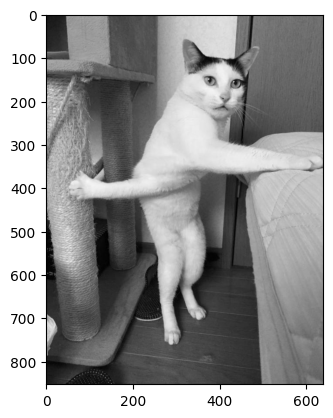

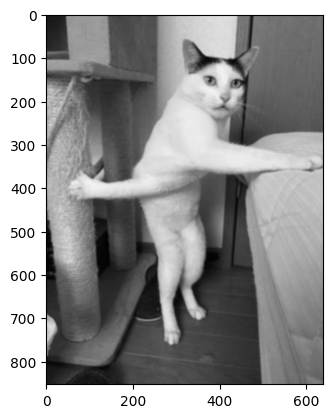

In [31]:
def create_gaussian_mask(size, sigma2):
    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]

    x0 = size // 2
    y0 = size // 2

    mask = np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * (sigma2)))
    rounded_mask = np.round(mask, 3)
    min = rounded_mask[0][0]

    for i in range(size):
        for j in range(size):
            rounded_mask[i][j] = np.round(rounded_mask[i][j] / min)
    return rounded_mask 

sigma2 = 2
img_bgr = cv2.imread("image/cat.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
imgGray = Grayscale(img_rgb)
size = 7
mask = np.full((size,size),1,dtype=np.uint16)
mask = create_gaussian_mask(size, alpha)
print(mask)

imH = imgGray.shape[0]
imW = imgGray.shape[1]
filterH = mask.shape[0]
filterW = mask.shape[1]
filterHCenter = int((filterH+1)/2)-1
filterWCenter = int((filterW+1)/2)-1

sumWeightMask = 0
for i in range(filterH):
    for j in range(filterW):
        sumWeightMask = sumWeightMask + mask[i][j]

imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
for i in range(imH):
    for j in range(imW):
        sumMask = 0
        for fi in range(filterH):
            for fj in range(filterW):
                posX = i + (fi-filterHCenter)
                posY = j + (fj-filterWCenter)
                if posX < 0 :
                    posX = 0
                elif posX >= imH :
                    posX = imH - 1
                if posY <0:
                    posY = 0
                elif posY >= imW :
                    posY = imW - 1 
                sumMask = sumMask + imgGray[posX][posY][1] * mask[fi][fj]
        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = int(sumMask/sumWeightMask)





print(sumWeightMask)
plt.imshow(imgGray)
plt.show()
plt.imshow(imgOut)
plt.show()

In [35]:
edge_Gx  = np.array([[-1,0,1],
                     [-1,0,1],
                     [-1,0,1]], dtype=np.int8)
edge_Gy  = np.array([[1,1,1],
                     [0,0,0],
                     [-1,-1,-1]], dtype=np.int8)
print(edge_Gx)
print(edge_Gy)
def edge_detect(img, mask):
    imH = img.shape[0]
    imW = img.shape[1]
    filterH = mask.shape[0]
    filterW = mask.shape[1]
    filterHCenter = int((filterH+1)/2)-1
    filterWCenter = int((filterW+1)/2)-1

    sumWeightMask = 0
    for i in range(filterH):
        for j in range(filterW):
            sumWeightMask = sumWeightMask + mask[i][j]

    imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
    for i in range(imH):
        for j in range(imW):
            imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = 255
            for fi in range(filterH):
                for fj in range(filterW):
                    posX = i + (fi-filterHCenter)
                    posY = j + (fj-filterWCenter)
                    if posX < 0 :
                        posX = 0
                    elif posX >= imH :
                        posX = imH - 1
                    if posY <0:
                        posY = 0
                    elif posY >= imW :
                        posY = imW - 1 

                    if mask[fi][fj] == 255 and img[posX][posY][0] != 255:
                        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = 0
                        break
    return imgOut

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


49


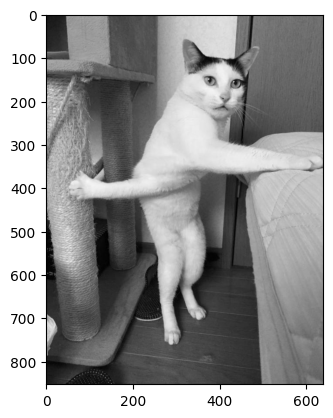

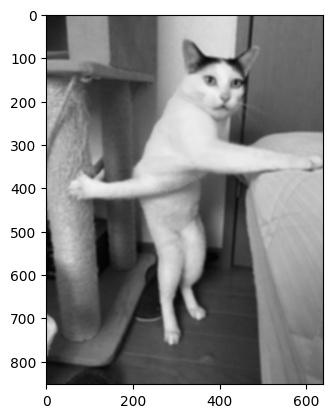

In [32]:
img_bgr = cv2.imread("image/cat.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
imgGray = Grayscale(img_rgb)
size = 7
mask = np.full((size,size),1,dtype=np.uint16)

imH = imgGray.shape[0]
imW = imgGray.shape[1]
filterH = mask.shape[0]
filterW = mask.shape[1]
filterHCenter = int((filterH+1)/2)-1
filterWCenter = int((filterW+1)/2)-1

sumWeightMask = 0
for i in range(filterH):
    for j in range(filterW):
        sumWeightMask = sumWeightMask + mask[i][j]

imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
for i in range(imH):
    for j in range(imW):
        sumMask = 0
        for fi in range(filterH):
            for fj in range(filterW):
                posX = i + (fi-filterHCenter)
                posY = j + (fj-filterWCenter)
                if posX < 0 :
                    posX = 0
                elif posX >= imH :
                    posX = imH - 1
                if posY <0:
                    posY = 0
                elif posY >= imW :
                    posY = imW - 1 
                sumMask = sumMask + imgGray[posX][posY][1] * mask[fi][fj]
        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = int(sumMask/sumWeightMask)





print(sumWeightMask)
plt.imshow(imgGray)
plt.show()
plt.imshow(imgOut)
plt.show()